# 3. 데이터 전처리

### 3-1. 깔끔한 데이터

In [109]:
import pandas as pd

In [111]:
pew = pd.read_csv('../data/pew.csv')
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [113]:
# 분산되어 있는 컬럼을 하나로 합치기 : wide data to long data
# 하나의 컬럼으로 합치기 : unpivot -> 'pivot 되돌리기' -> melt()

pew_long = pew.melt(id_vars = 'religion', var_name = 'income', value_name = 'count')

In [115]:
pew_long

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


### 3-3. 데이터 결합하기

In [3]:
import pandas as pd

In [7]:
billboard = pd.read_csv('../data/billboard.csv')

In [11]:
billboard.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
billboard_long = billboard.melt(
    id_vars = ['year','artist','track','time','date.entered'],
    var_name = 'week',
    value_name = 'rating'
)
print(billboard_long)

       year            artist                    track  time date.entered  \
0      2000             2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   
1      2000           2Ge+her  The Hardest Part Of ...  3:15   2000-09-02   
2      2000      3 Doors Down               Kryptonite  3:53   2000-04-08   
3      2000      3 Doors Down                    Loser  4:24   2000-10-21   
4      2000          504 Boyz            Wobble Wobble  3:35   2000-04-15   
...     ...               ...                      ...   ...          ...   
24087  2000       Yankee Grey     Another Nine Minutes  3:10   2000-04-29   
24088  2000  Yearwood, Trisha          Real Live Woman  3:55   2000-04-01   
24089  2000   Ying Yang Twins  Whistle While You Tw...  4:19   2000-03-18   
24090  2000     Zombie Nation            Kernkraft 400  3:30   2000-09-02   
24091  2000   matchbox twenty                     Bent  4:12   2000-04-29   

       week  rating  
0       wk1    87.0  
1       wk1    91.0  
2       w

In [17]:
print(billboard_long.loc[billboard_long.track == 'Loser'])

       year        artist  track  time date.entered  week  rating
3      2000  3 Doors Down  Loser  4:24   2000-10-21   wk1    76.0
320    2000  3 Doors Down  Loser  4:24   2000-10-21   wk2    76.0
637    2000  3 Doors Down  Loser  4:24   2000-10-21   wk3    72.0
954    2000  3 Doors Down  Loser  4:24   2000-10-21   wk4    69.0
1271   2000  3 Doors Down  Loser  4:24   2000-10-21   wk5    67.0
...     ...           ...    ...   ...          ...   ...     ...
22510  2000  3 Doors Down  Loser  4:24   2000-10-21  wk72     NaN
22827  2000  3 Doors Down  Loser  4:24   2000-10-21  wk73     NaN
23144  2000  3 Doors Down  Loser  4:24   2000-10-21  wk74     NaN
23461  2000  3 Doors Down  Loser  4:24   2000-10-21  wk75     NaN
23778  2000  3 Doors Down  Loser  4:24   2000-10-21  wk76     NaN

[76 rows x 7 columns]


##### 곡정보에 대한 데이터 프레임 구조 만들기

In [31]:
billboard_songs = billboard_long[['year','artist','track','time','date.entered']]
print(billboard_songs.shape)

(24092, 5)


In [33]:
billboard_songs = billboard_songs.drop_duplicates()
print(billboard_songs.shape)

(317, 5)


In [35]:
billboard_songs.head()

,year,artist,track,time,date.entered
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08
3,2000,3 Doors Down,Loser,4:24,2000-10-21
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15


In [37]:
billboard_songs['id'] = billboard_songs.index + 1
print(billboard_songs)

     year            artist                    track  time date.entered   id
0    2000             2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26    1
1    2000           2Ge+her  The Hardest Part Of ...  3:15   2000-09-02    2
2    2000      3 Doors Down               Kryptonite  3:53   2000-04-08    3
3    2000      3 Doors Down                    Loser  4:24   2000-10-21    4
4    2000          504 Boyz            Wobble Wobble  3:35   2000-04-15    5
..    ...               ...                      ...   ...          ...  ...
312  2000       Yankee Grey     Another Nine Minutes  3:10   2000-04-29  313
313  2000  Yearwood, Trisha          Real Live Woman  3:55   2000-04-01  314
314  2000   Ying Yang Twins  Whistle While You Tw...  4:19   2000-03-18  315
315  2000     Zombie Nation            Kernkraft 400  3:30   2000-09-02  316
316  2000   matchbox twenty                     Bent  4:12   2000-04-29  317

[317 rows x 6 columns]


In [39]:
billboard_ratings = billboard_long.merge(
    billboard_songs, on =['year','artist','track','time','date.entered']
)
print(billboard_ratings.shape)

(24092, 8)


In [41]:
print(billboard_ratings)

       year            artist                    track  time date.entered  \
0      2000             2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   
1      2000           2Ge+her  The Hardest Part Of ...  3:15   2000-09-02   
2      2000      3 Doors Down               Kryptonite  3:53   2000-04-08   
3      2000      3 Doors Down                    Loser  4:24   2000-10-21   
4      2000          504 Boyz            Wobble Wobble  3:35   2000-04-15   
...     ...               ...                      ...   ...          ...   
24087  2000       Yankee Grey     Another Nine Minutes  3:10   2000-04-29   
24088  2000  Yearwood, Trisha          Real Live Woman  3:55   2000-04-01   
24089  2000   Ying Yang Twins  Whistle While You Tw...  4:19   2000-03-18   
24090  2000     Zombie Nation            Kernkraft 400  3:30   2000-09-02   
24091  2000   matchbox twenty                     Bent  4:12   2000-04-29   

       week  rating   id  
0       wk1    87.0    1  
1       wk1    91.0  

In [45]:
billboard_ratings = billboard_ratings[['id','artist','track','week']]
print(billboard_ratings)

        id            artist                    track  week
0        1             2 Pac  Baby Don't Cry (Keep...   wk1
1        2           2Ge+her  The Hardest Part Of ...   wk1
2        3      3 Doors Down               Kryptonite   wk1
3        4      3 Doors Down                    Loser   wk1
4        5          504 Boyz            Wobble Wobble   wk1
...    ...               ...                      ...   ...
24087  313       Yankee Grey     Another Nine Minutes  wk76
24088  314  Yearwood, Trisha          Real Live Woman  wk76
24089  315   Ying Yang Twins  Whistle While You Tw...  wk76
24090  316     Zombie Nation            Kernkraft 400  wk76
24091  317   matchbox twenty                     Bent  wk76

[24092 rows x 4 columns]


### 3-4. 그룹연산하기

In [64]:
df = pd.read_csv('../data/gapminder.tsv',sep = '\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [52]:
df.shape[0]

1704

In [54]:
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [68]:
df.groupby('country').mean()   -- 해당 코드는 3.9버전 이하에서는 작동

TypeError: agg function failed [how->mean,dtype->object]

In [74]:
!python --version

Python 3.12.7


In [76]:
df.groupby ('continent').lifeExp.mean()

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [78]:
df.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

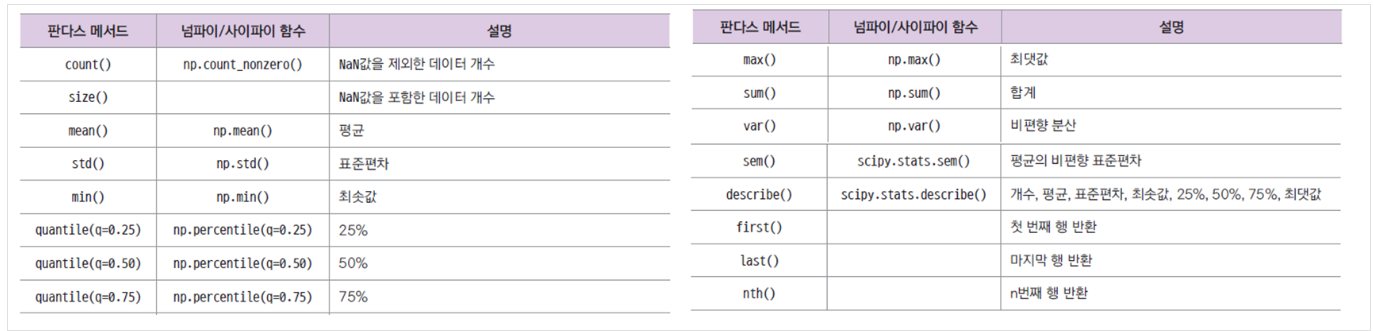

In [81]:
import numpy as np
df.groupby('continent').lifeExp.agg([np.mean, np.std, np.min, np.max])

C:\Users\HHS\AppData\Local\Temp\ipykernel_20560\3153457161.py:2: FutureWarning: The provided callable <function mean at 0x0000029B99668040> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('continent').lifeExp.agg([np.mean, np.std, np.min, np.max])
C:\Users\HHS\AppData\Local\Temp\ipykernel_20560\3153457161.py:2: FutureWarning: The provided callable <function std at 0x0000029B99668180> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby('continent').lifeExp.agg([np.mean, np.std, np.min, np.max])
C:\Users\HHS\AppData\Local\Temp\ipykernel_20560\3153457161.py:2: FutureWarning: The provided callable <function min at 0x0000029B99657740> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable wil

,mean,std,min,max
continent,,,,
Africa,48.865330,9.150210,23.599,76.442
Americas,64.658737,9.345088,37.579,80.653
Asia,60.064903,11.864532,28.801,82.603
Europe,71.903686,5.433178,43.585,81.757
Oceania,74.326208,3.795611,69.120,81.235


In [87]:
df.groupby('continent').agg(
    {
        'lifeExp':'mean',
        'pop':'median',
        'gdpPercap':'max'
    }
)

,lifeExp,pop,gdpPercap
continent,,,
Africa,48.865330,4579311.0,21951.21176
Americas,64.658737,6227510.0,42951.65309
Asia,60.064903,14530830.5,113523.13290
Europe,71.903686,8551125.0,49357.19017
Oceania,74.326208,6403491.5,34435.36744


In [97]:
df.groupby('continent').count()

,country,year,lifeExp,pop,gdpPercap
continent,,,,,
Africa,624,624,624,624,624
Americas,300,300,300,300,300
Asia,396,396,396,396,396
Europe,360,360,360,360,360
Oceania,24,24,24,24,24


In [89]:
country_s = df['country']
country_s.value_counts()

country
Afghanistan          12
Pakistan             12
New Zealand          12
Nicaragua            12
Niger                12
                     ..
Eritrea              12
Equatorial Guinea    12
El Salvador          12
Egypt                12
Zimbabwe             12
Name: count, Length: 142, dtype: int64

In [105]:
df.groupby('continent').filter(lambda x:x['pop'].max() > 9279625)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


### 3-5. 결측치 처리

In [8]:
import pandas as pd
from numpy import NAN, NaN, nan

In [10]:
import pandas as np
print(pd.isnull(NaN))
print(pd.notnull(NaN))

True
False


#### '결측치가 생기는 이유'

#### 3-5-1. 데이터를 불러올 때 생기는 결측치

In [20]:
file_dir = '../data/survey_visited.csv'
visited_df = pd.read_csv(file_dir)
visited_df

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [14]:
pd.read_csv(file_dir, keep_default_na = False)

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [26]:
file_dir2 = '../data/survey_survey.csv'
survey_df = pd.read_csv(file_dir2)
survey_df

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


#### 3-5-2. 데이터를 연결할 때

- concat()
- merge()
- join을 할 때, 열이 다르거나 인덱스가 다를 때 

In [137]:
visited_df.head()

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26


In [139]:
survey_df.head()

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41


In [30]:
new_df = visited_df.merge(survey_df, left_on = 'ident', right_on = 'taken')
new_df

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
6,734,DR-3,1939-01-07,734,pb,temp,-21.50
7,735,DR-3,1930-01-12,735,pb,rad,7.22
8,735,DR-3,1930-01-12,735,NaN,sal,0.06
9,735,DR-3,1930-01-12,735,NaN,temp,-26.00


#### 3-5-3. reset_index()할 때

In [35]:
file_dir3 = '../data/gapminder.tsv'
gap_df = pd.read_csv(file_dir3, sep ='\t')
gap_df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [39]:
new_df2 = gap_df.groupby(['year'])['lifeExp'].mean()
new_df2

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [51]:
over2000 = new_df2[new_df2.index > 2000]
over2000

year
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [49]:
over2000.reindex(range(2000,2010), fill_value = 0)

year
2000     0.000000
2001     0.000000
2002    65.694923
2003     0.000000
2004     0.000000
2005     0.000000
2006     0.000000
2007    67.007423
2008     0.000000
2009     0.000000
Name: lifeExp, dtype: float64

In [142]:
new_df

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
6,734,DR-3,1939-01-07,734,pb,temp,-21.50
7,735,DR-3,1930-01-12,735,pb,rad,7.22
8,735,DR-3,1930-01-12,735,NaN,sal,0.06
9,735,DR-3,1930-01-12,735,NaN,temp,-26.00


#### 결측치의 처리

In [54]:
import pandas as pd
ebola = pd.read_csv('../data/country_timeseries.csv')
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
print(ebola.count())

Date                   122
Day                    122
Cases_Guinea            93
Cases_Liberia           83
Cases_SierraLeone       87
Cases_Nigeria           38
Cases_Senegal           25
Cases_UnitedStates      18
Cases_Spain             16
Cases_Mali              12
Deaths_Guinea           92
Deaths_Liberia          81
Deaths_SierraLeone      87
Deaths_Nigeria          38
Deaths_Senegal          22
Deaths_UnitedStates     18
Deaths_Spain            16
Deaths_Mali             12
dtype: int64


In [58]:
# 열별 누락값 계산
total_row = ebola.shape[0] 
missing_cnt = total_row - ebola.count()
missing_cnt

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [146]:
import numpy as np
np.count_nonzero(ebola.isnull())

1282

In [148]:
ebola.Cases_Guinea.value_counts(dropna = False)

Cases_Guinea
NaN       29
86.0       3
495.0      2
112.0      2
390.0      2
          ..
1199.0     1
1298.0     1
1350.0     1
1472.0     1
49.0       1
Name: count, Length: 89, dtype: int64

In [62]:
ebola.fillna(0)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,0.0,10030.0,0.0,0.0,0.0,0.0,0.0,1786.0,0.0,2977.0,0.0,0.0,0.0,0.0,0.0
1,1/4/2015,288,2775.0,0.0,9780.0,0.0,0.0,0.0,0.0,0.0,1781.0,0.0,2943.0,0.0,0.0,0.0,0.0,0.0
2,1/3/2015,287,2769.0,8166.0,9722.0,0.0,0.0,0.0,0.0,0.0,1767.0,3496.0,2915.0,0.0,0.0,0.0,0.0,0.0
3,1/2/2015,286,0.0,8157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3496.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0,0.0,0.0,0.0,0.0,0.0,1739.0,3471.0,2827.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,66.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0
118,3/26/2014,4,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,3/25/2014,3,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,3/24/2014,2,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
ebola.fillna(method = 'ffill')

C:\Users\HHS\AppData\Local\Temp\ipykernel_1652\2779467564.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ebola.fillna(method = 'ffill')


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2769.0,8157.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [66]:
ebola.fillna(method = 'bfill')

C:\Users\HHS\AppData\Local\Temp\ipykernel_1652\1040676577.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ebola.fillna(method = 'bfill')


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,8166.0,10030.0,20.0,1.0,4.0,1.0,7.0,1786.0,3496.0,2977.0,8.0,0.0,1.0,0.0,6.0
1,1/4/2015,288,2775.0,8166.0,9780.0,20.0,1.0,4.0,1.0,7.0,1781.0,3496.0,2943.0,8.0,0.0,1.0,0.0,6.0
2,1/3/2015,287,2769.0,8166.0,9722.0,20.0,1.0,4.0,1.0,7.0,1767.0,3496.0,2915.0,8.0,0.0,1.0,0.0,6.0
3,1/2/2015,286,2730.0,8157.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3496.0,2827.0,8.0,0.0,1.0,0.0,6.0
4,12/31/2014,284,2730.0,8115.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3471.0,2827.0,8.0,0.0,1.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


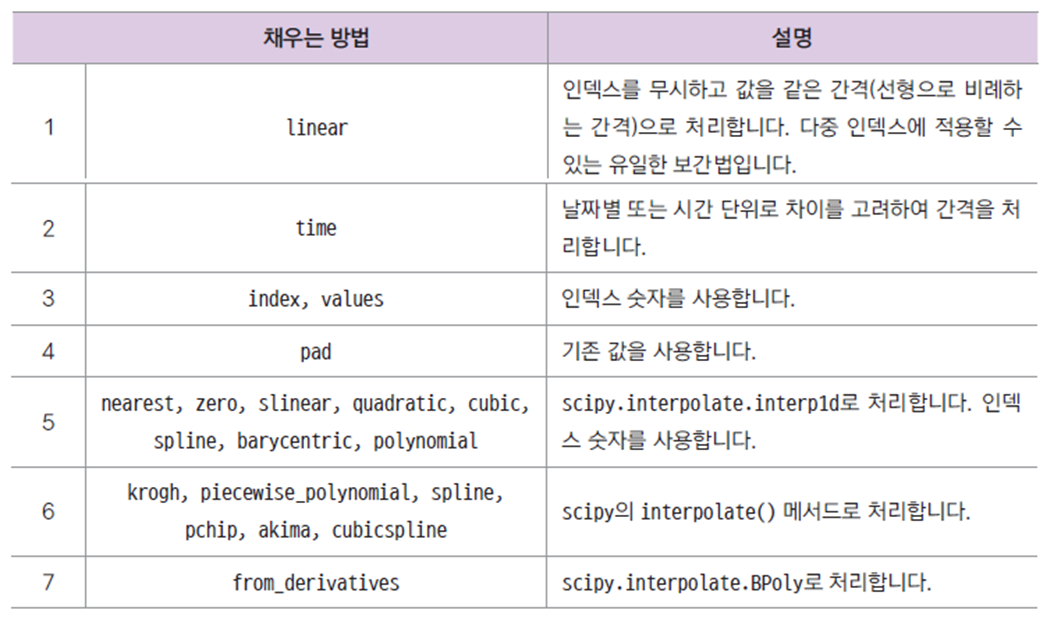

In [74]:
ebola.interpolate()

C:\Users\HHS\AppData\Local\Temp\ipykernel_1652\4098302585.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  ebola.interpolate()


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2749.5,8157.0,9677.5,NaN,NaN,NaN,NaN,NaN,1753.0,3496.0,2871.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [79]:
ebola.shape

(122, 18)

In [83]:
# 결측치 삭제

new_ebola = ebola.dropna()
new_ebola.shape

(1, 18)

In [87]:
# 결측치를 포함한 계산

ebola['CasesByCountry'] = (
ebola['Cases_Guinea'] + ebola['Cases_Liberia'] + ebola['Cases_SierraLeone']
)

In [95]:
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,CasesByCountry
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,20657.0
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN,20478.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,117.0
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
ebola.Cases_Guinea.sum(skipna = True)   # skipna = true 가 default이며, 결측치를 무시하고 계산

84729.0

In [97]:
ebola.Cases_Guinea.sum(skipna = False)   # 결측치를 포함하고 계산

nan

In [101]:
ebola.Cases_Guinea.sum()

84729.0